In [ ]:
import pandas as pd

In [ ]:

file_link = 'https://drive.google.com/file/d/19X2HPZgXx9duqZlWHiJoJekTGJ86Pk3G/view?usp=drive_link'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# Task
Analyze the dataset located at "/content/dataset_phishing.csv" to build a model that predicts the 'status' of a URL, and evaluate the model's performance.

## Explore data



In [ ]:
print("Shape of the DataFrame:", df.shape)
print("\nConcise summary of the DataFrame:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDistribution of the target variable 'status':")
print(df['status'].value_counts())

Shape of the DataFrame: (11430, 89)

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde         

In [ ]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


/tmp/ipython-input-1862714119.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['status'], palette='viridis')


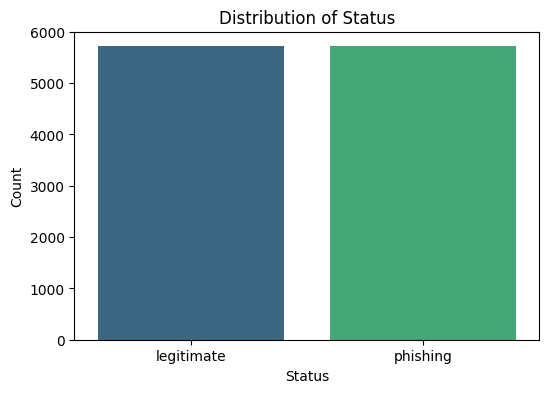

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution before oversampling
plt.figure(figsize=(6, 4))
sns.countplot(x=df['status'], palette='viridis')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2863535920.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')
/tmp/ipython-input-2863535920.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')
/tmp/ipython-input-2863535920.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True, palette='viridis')
/tmp/ipython-input-2863535920.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True, palette='viridis')
/tmp/ipython-input-2863535920.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn

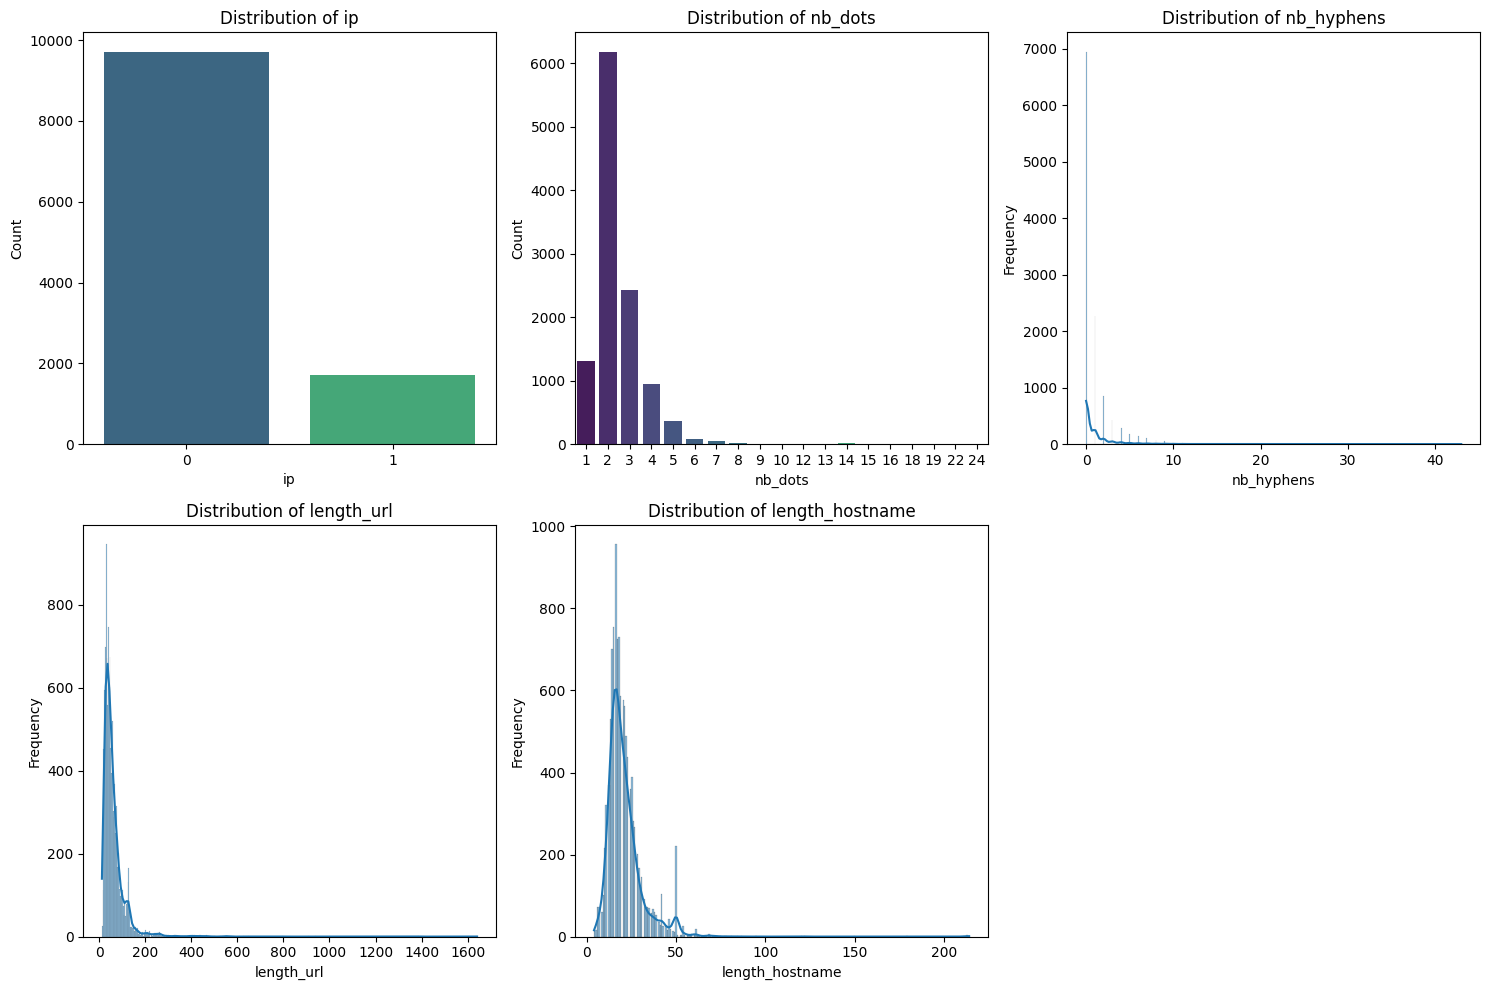

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of selected features to visualize
selected_features = ['ip', 'nb_dots', 'nb_hyphens', 'length_url', 'length_hostname']

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Iterate through selected features and create a countplot or histplot
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1) # Create subplots in a 2x3 grid
    if df[feature].nunique() < 20: # Use countplot for features with few unique values
        sns.countplot(x=df[feature], palette='viridis')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
    else: # Use histplot for features with many unique values (like lengths)
        sns.histplot(df[feature], kde=True, palette='viridis')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')


plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Prepare data

### Subtask:
Preprocess the data, which may include handling categorical features, scaling numerical features, and splitting the data into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

X = df.drop(['status', 'url'], axis=1)
y = df['status']


categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist() # Identify numerical columns


#  preprocessing: One-hot encoding to categorical and scaling to numerical
# We will use a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols) # Add StandardScaler for numerical columns
    ],
    remainder='passthrough'
)

# Create a pipeline for preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing pipeline to X
X_processed = pipeline.fit_transform(X)

# 4. Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)


X_train_processed = X_train
y_train_processed = y_train

print("Shape of original X_train:", X_train.shape)
print("Shape of original y_train:", y_train.shape)


Shape of original X_train: (9144, 87)
Shape of original y_train: (9144,)


In [ ]:
print("Preprocessed Training Features (X_train_processed):")
display(X_train_processed)

print("\nPreprocessed Training Labels (y_train_processed):")
display(y_train_processed)

print("\nPreprocessed Test Features (X_test):")
display(X_test)

print("\nPreprocessed Test Labels (y_test):")
display(y_test)

Preprocessed Training Features (X_train_processed):


array([[ 0.05196349, -0.47234208,  2.37518157, ..., -0.14330288,
         0.93426411,  1.10935487],
       [ 1.20939394,  2.6826127 ,  2.37518157, ..., -0.14330288,
         0.93426411, -1.25578819],
       [ 0.32323625, -0.93630602, -0.42102044, ..., -0.14330288,
         0.93426411, -0.07321666],
       ...,
       [-0.45441233,  0.73396416, -0.42102044, ..., -0.14330288,
         0.93426411,  0.71516436],
       [-0.16505472,  0.08441465, -0.42102044, ..., -0.14330288,
         0.93426411, -1.25578819],
       [-0.09271532, -0.56513487, -0.42102044, ..., -0.14330288,
         0.93426411, -0.46740717]])


Preprocessed Training Labels (y_train_processed):


,status
7609,legitimate
6408,phishing
7464,phishing
9286,legitimate
5159,legitimate
...,...
8364,phishing
9876,phishing
4943,phishing
9054,phishing



Preprocessed Test Features (X_test):


array([[-0.03846077, -1.02909881, -0.42102044, ..., -0.14330288,
         0.93426411, -1.25578819],
       [ 1.02854543,  1.56909925,  2.37518157, ..., -0.14330288,
         0.93426411, -1.25578819],
       [-0.12888502,  0.17720743, -0.42102044, ..., -0.14330288,
         0.93426411, -1.25578819],
       ...,
       [-0.52675174,  0.27000022, -0.42102044, ..., -0.14330288,
        -1.07036115,  0.32097385],
       [ 0.32323625, -0.47234208, -0.42102044, ..., -0.14330288,
        -1.07036115,  0.32097385],
       [-0.61717599, -0.19396372, -0.42102044, ..., -0.14330288,
        -1.07036115, -1.25578819]])


Preprocessed Test Labels (y_test):


,status
6172,phishing
9810,phishing
8537,phishing
605,phishing
6549,legitimate
...,...
4104,legitimate
6374,legitimate
6232,legitimate
3950,legitimate


## Build model



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the chosen model
model = LogisticRegression(max_iter=2000) # Increased max_iter for convergence

#  Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
# execute to show the accuracy.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#  predictions on the test set
y_pred = model.predict(X_test)

# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9366
Precision: 0.9366
Recall: 0.9366
F1-score: 0.9366


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Encode the target variable 'status' to numerical labels
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Initialize and train the XGBoost classifier
# Using parameters that often work well, can be tuned further
xgb_model = xgb.XGBClassifier(objective='binary:logistic', # Binary classification
                              n_estimators=500,           # Number of boosting rounds
                              learning_rate=0.2,          # Step size shrinkage
                              max_depth=3,                # Maximum depth of a tree
                              random_state=42,
                              use_label_encoder=False,    # Suppress warning
                              eval_metric='logloss')      # Evaluation metric

print("Training XGBoost model...")
# Train with encoded labels
xgb_model.fit(X_train, y_train_resampled_encoded)
print("XGBoost model training complete.")

# Make predictions on the test set (predictions will be numerical)
y_pred_xgb_encoded = xgb_model.predict(X_test)

# Decode the predictions back to original labels for evaluation
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)


# Evaluate the XGBoost model using original labels for comparison
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print the evaluation metrics for XGBoost
print("\nXGBoost Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")

Training XGBoost model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:25:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model training complete.

XGBoost Model Evaluation Metrics:
Accuracy: 0.9641
Precision: 0.9642
Recall: 0.9641
F1-score: 0.9641


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest classifier
# Using parameters that often work well, can be tuned further
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced') # Added class_weight

print("Training Random Forest model...")
rf_model.fit(X_train, y_train) # Use resampled data for training
print("Random Forest model training complete.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print the evaluation metrics for Random Forest
print("\nRandom Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

Training Random Forest model...
Random Forest model training complete.

Random Forest Model Evaluation Metrics:
Accuracy: 0.9624
Precision: 0.9624
Recall: 0.9624
F1-score: 0.9624


## Build BiLSTM model with PyTorch

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_processed.astype('category').cat.codes.values, dtype=torch.long) # Encode labels numerically
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.astype('category').cat.codes.values, dtype=torch.long) # Encode labels numerically

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Data prepared for PyTorch.")

Data prepared for PyTorch.


In [ ]:
class BiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers,
                            bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x: [batch_size, sequence_length, input_dim]
        # In this case, sequence_length is 1 as each URL is a single instance
        # LSTM expects input shape [batch_size, sequence_length, input_dim]

        # Unsqueeze to add a sequence_length dimension
        x = x.unsqueeze(1) # x: [batch_size, 1, input_dim]


        h0 = torch.zeros(self.n_layers * (2 if self.lstm.bidirectional else 1), x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.n_layers * (2 if self.lstm.bidirectional else 1), x.size(0), self.hidden_dim).to(x.device)


        output, (hidden, cell) = self.lstm(x, (h0.detach(), c0.detach()))


        if self.lstm.bidirectional:
            # Concatenate the hidden states from the forward and backward directions
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            hidden = hidden[-1,:,:] # Get hidden state from the last layer

        hidden = self.dropout(hidden)
        out = self.fc(hidden) # out: [batch_size, output_dim]

        return out

In [ ]:
# Model hyperparameters
input_dim = X_train_processed.shape[1] # Number of features
hidden_dim = 128
output_dim = 2 # For binary classification (legitimate or phishing)
n_layers = 2
bidirectional = True
dropout = 0.5

# Instantiate the model
model_bilstm = BiLSTM(input_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_bilstm.parameters(), lr=0.001)

print("BiLSTM model defined and training setup complete.")

BiLSTM model defined and training setup complete.


In [ ]:
# Training loop
def train_model(model, loader, criterion, optimizer, num_epochs=10):
    model.train() # Set model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in loader:
            optimizer.zero_grad() # Zero the gradients
            outputs = model(inputs) # Forward pass
            loss = criterion(outputs, labels) # Compute loss
            loss.backward() # Backward pass
            optimizer.step() # Update weights
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(loader.dataset)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Train the model
num_epochs = 10
print("Starting BiLSTM model training...")
train_model(model_bilstm, train_loader, criterion, optimizer, num_epochs)
print("BiLSTM model training finished.")

Starting BiLSTM model training...
Epoch [1/10], Loss: 0.2496
Epoch [2/10], Loss: 0.1298
Epoch [3/10], Loss: 0.1157
Epoch [4/10], Loss: 0.1073
Epoch [5/10], Loss: 0.0982
Epoch [6/10], Loss: 0.0923
Epoch [7/10], Loss: 0.0892
Epoch [8/10], Loss: 0.0835
Epoch [9/10], Loss: 0.0825
Epoch [10/10], Loss: 0.0761
BiLSTM model training finished.


In [ ]:
# Evaluation loop
def evaluate_model(model, loader):
    model.eval() # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad(): # Disable gradient calculation
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Evaluate the BiLSTM model
bilstm_accuracy = evaluate_model(model_bilstm, test_loader)
print(f"BiLSTM Model Accuracy on Test Set: {bilstm_accuracy:.4f}")

BiLSTM Model Accuracy on Test Set: 0.9606


## Compare Model Performance

In [ ]:
# Print the evaluation metrics for all models
print("Model Performance Comparison:")
print(f"Logistic Regression - Accuracy: {accuracy:.4f}")
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"BiLSTM - Accuracy: {bilstm_accuracy:.4f}")

# You can add precision, recall, and F1-score for all models as well for a more comprehensive comparison

Model Performance Comparison:
Logistic Regression - Accuracy: 0.9366
XGBoost - Accuracy: 0.9641
Random Forest - Accuracy: 0.9624
BiLSTM - Accuracy: 0.9606


/tmp/ipython-input-3309618593.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


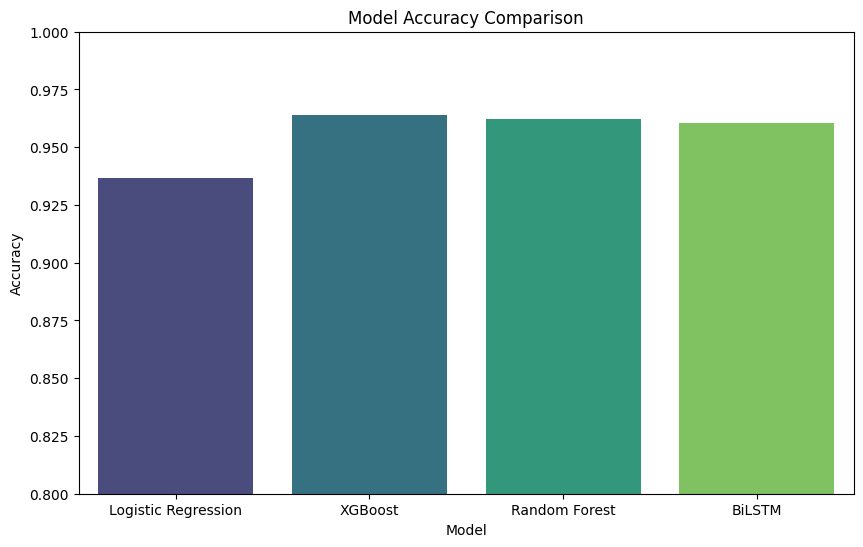

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary of model accuracies
model_accuracies = {
    'Logistic Regression': accuracy,
    'XGBoost': accuracy_xgb,
    'Random Forest': accuracy_rf,
    'BiLSTM': bilstm_accuracy
}

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0) # Set y-axis limits to focus on the differences
plt.show()

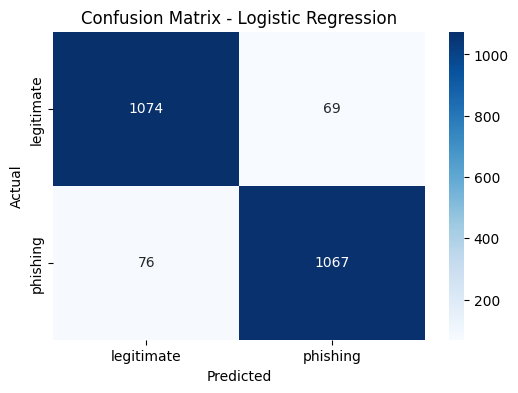

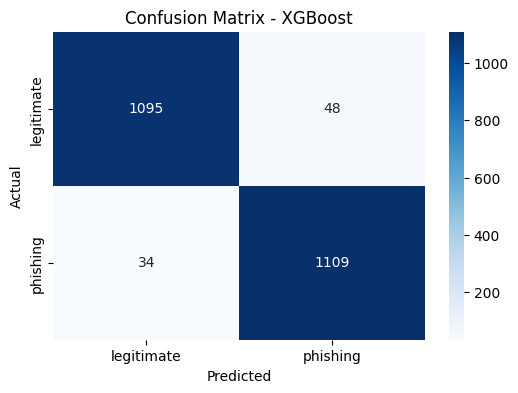

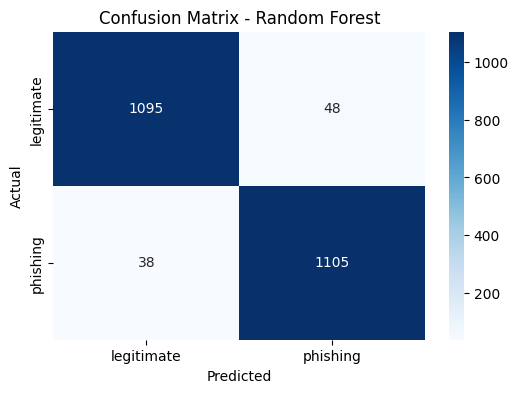

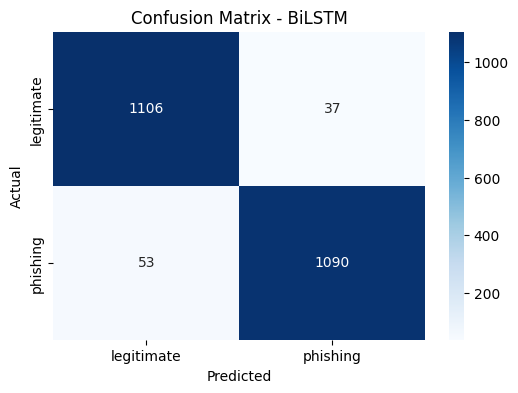

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['legitimate', 'phishing'], yticklabels=['legitimate', 'phishing'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['legitimate', 'phishing'], yticklabels=['legitimate', 'phishing'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['legitimate', 'phishing'], yticklabels=['legitimate', 'phishing'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for BiLSTM
# Since BiLSTM outputs are tensors, we need to convert them to numpy arrays
y_pred_bilstm_encoded = torch.max(model_bilstm(X_test_tensor), 1)[1].numpy()
y_pred_bilstm = label_encoder.inverse_transform(y_pred_bilstm_encoded) # Decode using the same encoder as for XGBoost

cm_bilstm = confusion_matrix(y_test, y_pred_bilstm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bilstm, annot=True, fmt='d', cmap='Blues', xticklabels=['legitimate', 'phishing'], yticklabels=['legitimate', 'phishing'])
plt.title('Confusion Matrix - BiLSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()